In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn import linear_model #Linear Regression
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.cluster import KMeans # KMeans clustering 
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt # Python defacto plotting library
import seaborn as sns # More snazzy plotting library
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
# read data of all genres
popData = pd.read_csv('C:/Users/armch/Desktop/Hackathons/HtN_2017/allGenreSet.csv')
popData.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,...,speechiness,tempo,time_signature,track_href,type,uri,valence,popularity,artist,Genre
0,0.2560,https://api.spotify.com/v1/audio-analysis/7vGu...,0.520,180823,0.761,7vGuf3Y35N4wmASOKLUVVU,0.000005,4,0.170,-3.093,...,0.0853,141.971,4,https://api.spotify.com/v1/tracks/7vGuf3Y35N4w...,audio_features,spotify:track:7vGuf3Y35N4wmASOKLUVVU,0.2660,97,Marshmello,Pop
1,0.1010,https://api.spotify.com/v1/audio-analysis/1j4k...,0.258,239000,0.437,1j4kHkkpqZRBwE0A4CN4Yv,0.000001,11,0.106,-6.593,...,0.0390,180.043,4,https://api.spotify.com/v1/tracks/1j4kHkkpqZRB...,audio_features,spotify:track:1j4kHkkpqZRBwE0A4CN4Yv,0.0967,93,Taylor Swift,Pop
2,0.2100,https://api.spotify.com/v1/audio-analysis/2Vjt...,0.767,211859,0.671,2VjtYe7gpfUi2OkGxR2O2z,0.000011,9,0.129,-6.416,...,0.1420,128.072,4,https://api.spotify.com/v1/tracks/2VjtYe7gpfUi...,audio_features,spotify:track:2VjtYe7gpfUi2OkGxR2O2z,0.4740,85,Sam Smith,Pop
3,0.0264,https://api.spotify.com/v1/audio-analysis/743m...,0.695,203760,0.632,743mWMRgafToEUJriLLgkg,0.000000,11,0.252,-6.922,...,0.2610,143.794,4,https://api.spotify.com/v1/tracks/743mWMRgafTo...,audio_features,spotify:track:743mWMRgafToEUJriLLgkg,0.8700,91,ZAYN,Pop
4,0.6180,https://api.spotify.com/v1/audio-analysis/7oAr...,0.515,201000,0.378,7oAraczbemGSNWqnbkU87R,0.000000,5,0.172,-8.264,...,0.0650,91.883,4,https://api.spotify.com/v1/tracks/7oAraczbemGS...,audio_features,spotify:track:7oAraczbemGSNWqnbkU87R,0.5360,92,Demi Lovato,Pop


In [3]:
#slice out artist names for later use
artist_pop = pd.DataFrame(popData.loc[:, ['artist','Genre']])

#delete non-metric columns
popData.drop(['analysis_url','id','track_href', 'type', 'uri', 'time_signature','artist', 'Genre'], inplace = True, axis = 1)

artist_pop.head()

,artist,Genre
0,Marshmello,Pop
1,Taylor Swift,Pop
2,Sam Smith,Pop
3,ZAYN,Pop
4,Demi Lovato,Pop


In [4]:
#split data into training(60%) and testing set (40%)
train_df = popData[0:int(len(popData) * 0.6)]
test_df = popData[int(len(popData) * 0.6) : len(popData)]
popData.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,popularity
count,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000
mean,0.145409,0.576163,216137.272785,0.722742,0.029014,5.395793,0.180495,-6.189431,0.717655,0.072116,124.115535,0.508598,62.472275
std,0.198918,0.136792,45078.452738,0.174081,0.117073,3.568500,0.135178,2.531925,0.450284,0.066094,29.511375,0.205705,17.519068
min,0.000002,0.137000,110093.000000,0.056500,0.000000,0.000000,0.011900,-19.846000,0.000000,0.022400,60.560000,0.039500,0.000000
25%,0.006070,0.488000,188834.000000,0.597000,0.000000,2.000000,0.092500,-7.248000,0.000000,0.034800,101.007000,0.347000,53.000000
50%,0.050800,0.581000,210867.000000,0.747000,0.000005,6.000000,0.128000,-5.666000,1.000000,0.047200,120.978000,0.505000,66.000000
75%,0.214000,0.660000,233240.000000,0.865000,0.000389,9.000000,0.234000,-4.452000,1.000000,0.078100,145.053000,0.667000,74.000000
max,0.970000,0.957000,723786.000000,0.996000,0.901000,11.000000,0.917000,-0.912000,1.000000,0.487000,205.958000,0.966000,100.000000


In [5]:
#check dimention of artist names
popData.head()
artist_pop.head()

,artist,Genre
0,Marshmello,Pop
1,Taylor Swift,Pop
2,Sam Smith,Pop
3,ZAYN,Pop
4,Demi Lovato,Pop


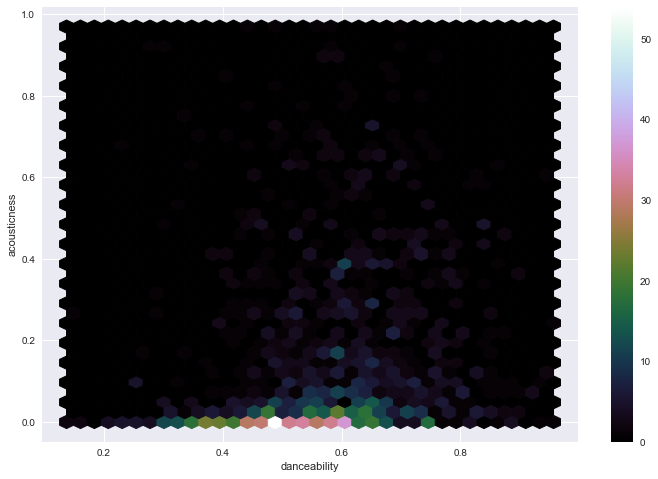

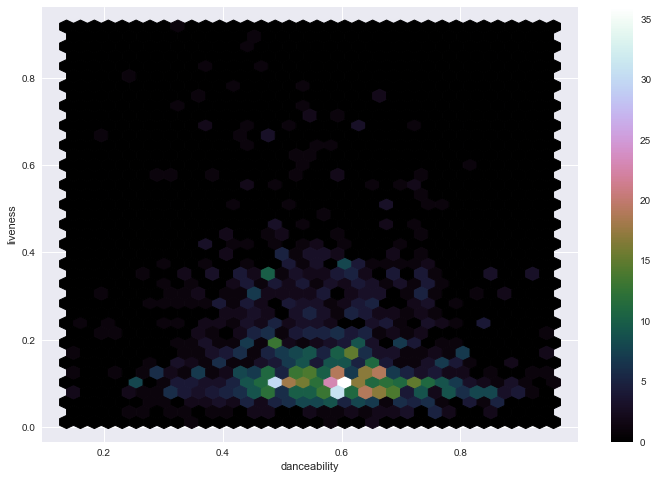

In [6]:
popData.plot(x = 'danceability', y ='acousticness', kind='hexbin', gridsize=35, sharex=False, colormap='cubehelix', figsize=(12,8))
popData.plot(x = 'danceability', y ='liveness', kind='hexbin', gridsize=35, sharex=False, colormap='cubehelix', figsize=(12,8))

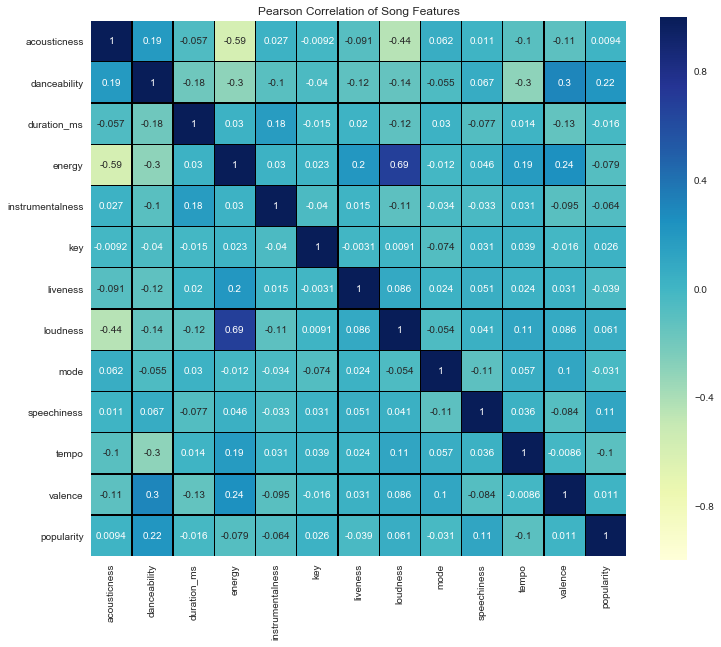

In [7]:
#set up the matplotlib
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of Song Features')

#Heatmap using seaborn
sns.heatmap(popData.astype(float).corr(), linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

In [8]:
# Calculating Eigenvectors and eigenvalues of Cov matirx
from sklearn.preprocessing import StandardScaler
popData_std = StandardScaler().fit_transform(popData)
mean_vec = np.mean(popData_std, axis=0)
cov_mat = np.cov(popData_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [9]:
#make list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance
len(cum_var_exp)  #13
cum_var_exp
#len(var_exp)

array([  18.5268512 ,   31.09267206,   40.79505907,   49.27144268,
         57.04850501,   64.47760903,   71.86281467,   78.8735218 ,
         84.86698048,   90.66018887,   94.75331058,   98.45485862,  100.        ])

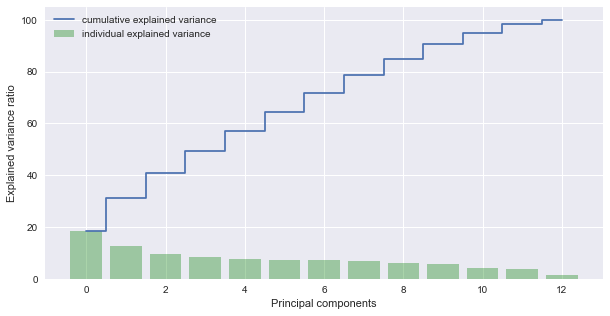

In [10]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(10, 5))
plt.bar(range(13), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(13), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [11]:
# >90% of the variance can be explained with the top 10 components
pca = PCA(n_components = 10)
popData_10d = pca.fit_transform(popData_std)
pd.DataFrame(popData_10d)

,0,1,2,3,4,5,6,7,8,9
0,-0.405287,-0.356028,0.892345,-0.489133,0.565737,-1.697335,-1.128992,-0.183355,-1.621221,-0.132900
1,0.195977,2.236277,2.644317,-1.152635,-1.609315,-0.657188,-1.387913,-0.324272,-0.991425,-1.914373
2,0.867657,-1.342589,2.127967,0.126038,-0.473314,0.318403,-0.273054,0.703803,0.221362,-0.663023
3,0.004724,-2.166772,2.506601,-0.307285,0.622712,1.260076,-0.791130,2.013782,1.102183,-0.805353
4,2.954463,-0.253869,-0.004885,-0.177446,0.595217,-0.337147,-1.183774,-0.449044,-1.006201,-0.091348
5,1.979616,0.840583,0.491471,0.221737,-0.345755,0.753387,1.285902,-0.961471,0.634149,-0.524794
6,0.363124,-1.595381,1.331744,0.650039,-1.054934,0.664461,-0.213205,0.260239,0.042954,-0.879648
7,0.923002,-2.188846,1.791975,1.253986,1.311261,0.812022,-0.157074,-0.698692,-0.566980,-0.738351
8,-0.317384,-0.449992,0.399183,-0.191484,0.968113,-1.627754,-0.839310,0.881009,-0.067322,-0.504937
9,-0.203114,-1.865563,-0.244480,0.553920,0.143619,0.680277,-1.363916,-0.296619,-0.981027,-0.105938


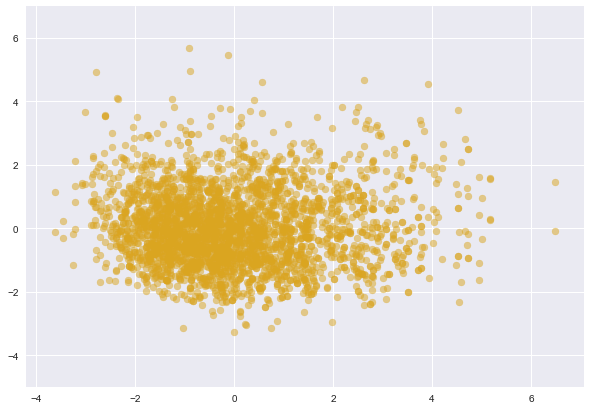

In [12]:
#plot the PCA model
plt.figure(figsize = (10,7))
plt.scatter(popData_10d[:,0],popData_10d[:,1], c='goldenrod',alpha=0.5)
plt.scatter(popData_10d[:,0],popData_10d[:,2], c='goldenrod',alpha=0.5)
plt.ylim(-5,7)
plt.show()

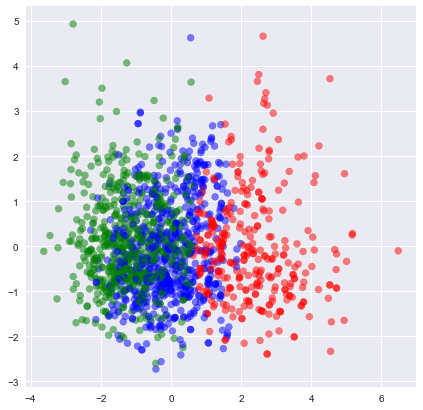

In [13]:
#3 KMeans clustering
kmeans = KMeans(n_clusters=3)
# Compute cluster centers and predict cluster indices
popData_clustered = kmeans.fit_predict(popData_10d)

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in popData_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(popData_10d[:,0],popData_10d[:,2], c= label_color, alpha=0.5) 
plt.show()

In [14]:
# Create a temp dataframe from our PCA projection data "MockData_10d"
df = pd.DataFrame(popData_10d)
df = df[[0,1,2]] # only want to visualise relationships between first 3 projections
df['popData_cluster'] = popData_clustered

C:\Users\armch\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\armch\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


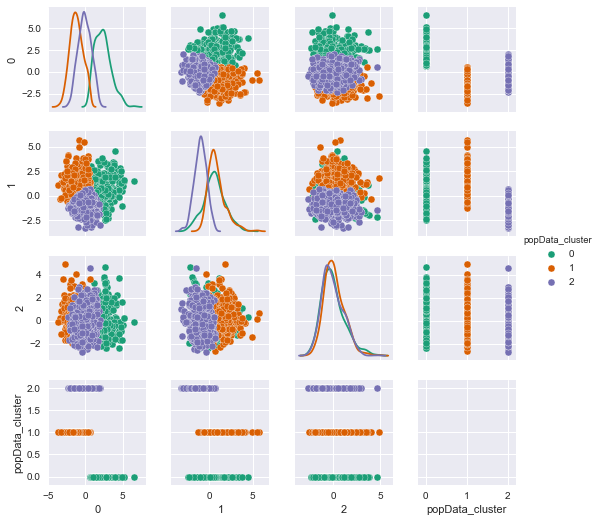

In [15]:
# Call Seaborn's pairplot to visualize our KMeans clustering on the PCA projected data
sns.pairplot(df, hue='popData_cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

In [16]:
popData_10d.shape

(1569, 10)

In [18]:
# read artist metadata as input
artistData = pd.read_csv('C:/Users/armch/Desktop/Hackathons/HtN_2017/khalidMusicData.csv')

#clean input data
artistData.drop(['analysis_url','id','track_href', 'type', 'uri', 'time_signature'], inplace = True, axis = 1)
artistData = pd.DataFrame(artistData)

# take the mean of artist data
artistData_avg = artistData.loc[0:0]
artistData.columns

for column in artistData.columns:
    artistData_avg[column] = artistData[column].mean()
artistData_avg

# Standardize artist input average using fitting to Pop Data (trainig set)
artistData_avg_std = StandardScaler().fit(popData).transform(artistData_avg)
artistData_avg_std


# calculate the PC's for the standardized artist input fitting to standardized training set
artistPCA = pca.fit(popData_std).transform(artistData_avg_std)
artistPCA


C:\Users\armch\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


array([[ 2.3445909 , -0.8126615 ,  0.70919916,  0.02249293,  0.49248512,
        -0.51991912, -0.42545096, -0.04680105, -0.49005034, -0.16150471]])

In [19]:
# Calculate Euclidean distance between genre data and input data
import scipy
euclDis = []
for j in range(len(popData_10d)):
    temp = scipy.spatial.distance.euclidean(popData_10d[j], artistPCA[0])
    euclDis.append(temp)
    
type(euclDis)

list

In [20]:
# add in the Disimilarity column to artists names
artist_pop["Disimilarity"] = pd.Series(list(euclDis), index = artist_pop.index)
artist_pop

,artist,Genre,Disimilarity
0,Marshmello,Pop,3.354296
1,Taylor Swift,Pop,5.272744
2,Sam Smith,Pop,2.732324
3,ZAYN,Pop,4.600306
4,Demi Lovato,Pop,1.512028
5,Logic,Pop,3.230888
6,Dua Lipa,Pop,3.171222
7,Louis Tomlinson,Pop,3.143867
8,Taylor Swift,Pop,3.184621
9,Justin Bieber,Pop,3.397171


In [40]:
#find the 5 most similar songs in each genre comparing to the test set
genres = artist_pop.Genre.unique()
simArtists = pd.DataFrame(columns=list(artist_pop.columns))


for genre in genres:
    tempSet = artist_pop.loc[artist_pop['Genre'] == genre]
    tempRows = tempSet.nsmallest(5, 'Disimilarity')
    simArtists = simArtists.append(tempRows, ignore_index=True)

simArtists['Music Similarity Score'] = 100/ (1.1 ** simArtists['Disimilarity'] )
simArtists['Music Similarity Score'] = simArtists['Music Similarity Score'].astype(int)

simArtists.to_csv('C:/Users/armch/Desktop/Hackathons/HtN_2017/similarArtists_music.csv')

simArtists

,artist,Genre,Disimilarity,Music Similarity Score
0,Demi Lovato,Pop,1.512028,86
1,Lorde,Pop,1.562240,86
2,Alan Walker,Pop,1.572959,86
3,Kanye West,Pop,1.600688,85
4,Hailee Steinfeld,Pop,1.671577,85
5,Neck Deep,Punk,3.651537,70
6,The Used,Punk,4.112517,67
7,Knuckle Puck,Punk,4.126566,67
8,With Confidence,Punk,4.383530,65
9,Coldfront,Punk,4.532263,64
